In [32]:
import numpy as np                         # for matrices
import matplotlib.pyplot as plt            # for image vizualization
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

from tensorflow.keras.models import Sequential
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization, Flatten, Conv2D, MaxPool2D
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.preprocessing.image import ImageDataGenerator


from tensorflow.keras.datasets import mnist


#### Data Preparation

In [33]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [34]:
print("Traning data shape        :"  ,x_train.shape)
print("Traning data labels shape :"  ,y_train.shape)
print("Testing data shape        :"  ,x_test.shape)
print("Testing data shape        :"  ,y_test.shape)

Traning data shape        : (60000, 28, 28)
Traning data labels shape : (60000,)
Testing data shape        : (10000, 28, 28)
Testing data shape        : (10000,)


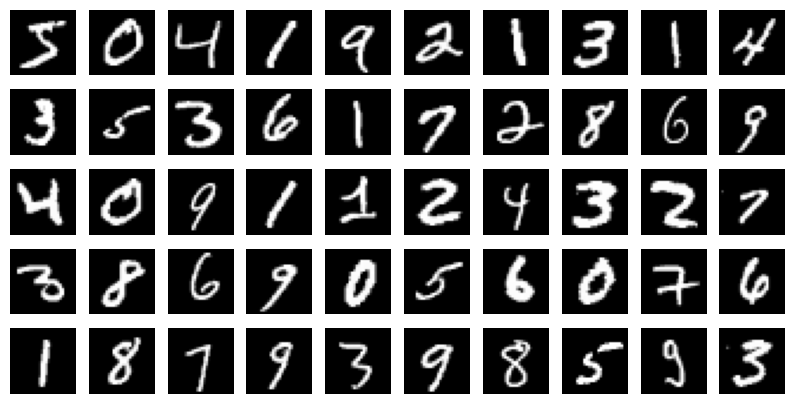

In [35]:
plt.figure(figsize=(10,5))

for i in range(50):
    plt.subplot(5,10,i+1)
    plt.imshow(x_train[i],cmap='gray')
    plt.axis("off")
plt.show()

In [36]:
# Normalizaion
X_train = x_train.astype('float')/255
X_test =  x_test.astype('float')/255

Y_train = to_categorical(y_train, num_classes=10)
Y_test = to_categorical(y_test, num_classes=10)

In [37]:
X_train[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

In [38]:
Y_train[0]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

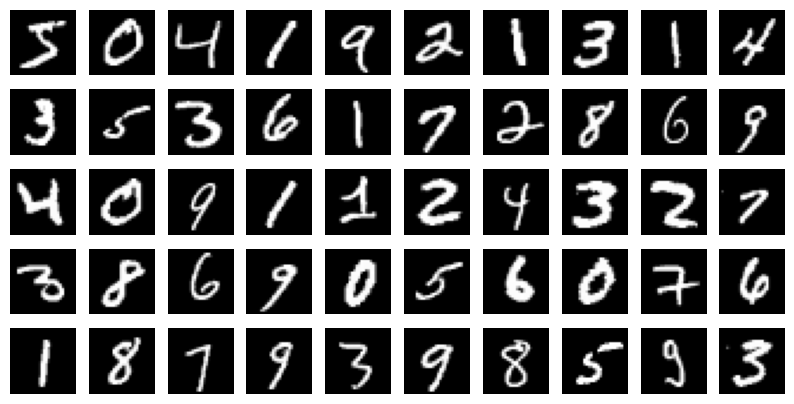

In [39]:
plt.figure(figsize=(10,5))

for i in range(50):
    plt.subplot(5,10,i+1)
    plt.imshow(X_train[i],cmap='gray')
    plt.axis("off")
plt.show()

In [40]:
# Splitting into train and validation sets

X_train, X_val, Y_train, Y_val  = train_test_split(X_train, Y_train, test_size=0.1, random_state=2 )


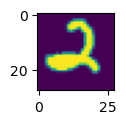

In [41]:
plt.figure(figsize=(5,1))
plt.imshow(X_val[0])

In [42]:
X_train.shape

(54000, 28, 28)

In [43]:
X_val.shape

(6000, 28, 28)

#### Model


In [44]:
model = Sequential()

model.add(Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same', 
                 activation ='relu', input_shape = (28,28,1)))
model.add(Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same', 
                 activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.25))


model.add(Conv2D(filters = 64, kernel_size = (3,3),padding = 'Same', 
                 activation ='relu'))
model.add(Conv2D(filters = 64, kernel_size = (3,3),padding = 'Same', 
                 activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2), strides=(2,2)))
model.add(Dropout(0.25))


model.add(Flatten())
model.add(Dense(256, activation = "relu"))
model.add(Dropout(0.5))
model.add(Dense(10, activation = "softmax"))


In [45]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_8 (Conv2D)           (None, 28, 28, 32)        832       
                                                                 
 conv2d_9 (Conv2D)           (None, 28, 28, 32)        25632     
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 14, 14, 32)       0         
 2D)                                                             
                                                                 
 dropout_6 (Dropout)         (None, 14, 14, 32)        0         
                                                                 
 conv2d_10 (Conv2D)          (None, 14, 14, 64)        18496     
                                                                 
 conv2d_11 (Conv2D)          (None, 14, 14, 64)        36928     
                                                      

In [46]:
model.compile(optimizer = 'Adam' , loss = "categorical_crossentropy", metrics=["accuracy"])

In [47]:
history = model.fit(X_train,Y_train, batch_size=128, validation_data=(X_val,Y_val), epochs=10)

Epoch 1/10
422/422 [==============================] - 45s 106ms/step - loss: 0.2383 - accuracy: 0.9246 - val_loss: 0.0526 - val_accuracy: 0.9840
Epoch 2/10
422/422 [==============================] - 48s 114ms/step - loss: 0.0750 - accuracy: 0.9777 - val_loss: 0.0336 - val_accuracy: 0.9890
Epoch 3/10
422/422 [==============================] - 47s 111ms/step - loss: 0.0548 - accuracy: 0.9834 - val_loss: 0.0312 - val_accuracy: 0.9898
Epoch 4/10
422/422 [==============================] - 47s 110ms/step - loss: 0.0434 - accuracy: 0.9870 - val_loss: 0.0291 - val_accuracy: 0.9913
Epoch 5/10
422/422 [==============================] - 45s 107ms/step - loss: 0.0374 - accuracy: 0.9881 - val_loss: 0.0231 - val_accuracy: 0.9927
Epoch 6/10
422/422 [==============================] - 47s 111ms/step - loss: 0.0316 - accuracy: 0.9904 - val_loss: 0.0293 - val_accuracy: 0.9913
Epoch 7/10
422/422 [==============================] - 47s 112ms/step - loss: 0.0300 - accuracy: 0.9906 - val_loss: 0.0309 - val_ac

In [48]:
loss,acc = model.evaluate(X_test,Y_test)

313/313 [==============================] - 3s 10ms/step - loss: 0.0184 - accuracy: 0.9940


In [49]:
# predictions on testing set and valiadation with confusion matrix

Y_pred = model.predict(X_test)



In [50]:
Y_pred

array([[8.1766767e-14, 9.1347668e-10, 1.4531908e-11, ..., 9.9999940e-01,
        7.7976465e-13, 5.8898991e-07],
       [2.5164693e-08, 1.1390078e-07, 9.9999988e-01, ..., 7.2590461e-11,
        4.0760134e-10, 1.4057512e-12],
       [3.5852810e-10, 9.9999988e-01, 2.6990401e-09, ..., 6.6721185e-08,
        6.6984844e-09, 1.3109207e-10],
       ...,
       [5.7680250e-17, 1.2416270e-12, 1.5792141e-13, ..., 1.0040941e-11,
        9.7640160e-11, 2.5082361e-09],
       [8.7567573e-13, 5.9540114e-15, 2.8665114e-17, ..., 4.4433362e-15,
        5.9485391e-08, 8.8527241e-11],
       [3.2340955e-07, 5.7027655e-10, 1.9238853e-09, ..., 1.9508347e-12,
        1.4000294e-08, 8.7218149e-12]], dtype=float32)

In [51]:
Y_prd_class = np.argmax(Y_pred[:], axis=1)

In [52]:
Y_prd_class

array([7, 2, 1, ..., 4, 5, 6], dtype=int64)

In [53]:
Y_true = y_test

<AxesSubplot:>

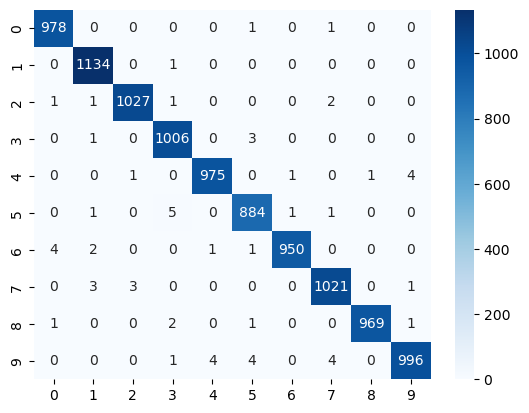

In [54]:
confusion_mtx = confusion_matrix(Y_true, Y_prd_class)
sns.heatmap(confusion_mtx, annot=True,cmap='Blues',fmt='.9g' ) 

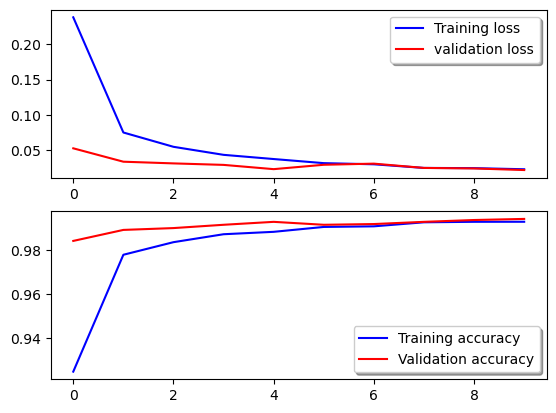

In [55]:
fig, ax = plt.subplots(2,1)
ax[0].plot(history.history['loss'], color='b', label="Training loss")
ax[0].plot(history.history['val_loss'], color='r', label="validation loss",axes =ax[0])
legend = ax[0].legend(loc='best', shadow=True)

ax[1].plot(history.history['accuracy'], color='b', label="Training accuracy")
ax[1].plot(history.history['val_accuracy'], color='r',label="Validation accuracy")
legend = ax[1].legend(loc='best', shadow=True)

In [56]:
history.params

{'verbose': 1, 'epochs': 10, 'steps': 422}